In [86]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [87]:
print(sklearn.__version__)

1.8.0


### Load the data

In [88]:
iris = load_iris(as_frame=True)
df = pd.concat([iris.data, iris.target], axis=1)

In [89]:
X = df[['petal length (cm)', 'petal width (cm)']].values
y = df['target'].values

In [90]:
print(X.shape)
print(y.shape)

(150, 2)
(150,)


### Train-test split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y)

In [92]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(120, 2)
(120,)
(30, 2)
(30,)
(array([0, 1, 2]), array([40, 40, 40]))
(array([0, 1, 2]), array([10, 10, 10]))


### Feature scaling

In [93]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())
print()
print(X_train_scaled.min(), X_train_scaled.max())
print(X_test_scaled.min(), X_test_scaled.max())

0.1 6.7
0.2 6.9

-1.5560840190991845 1.722544933679856
-1.385085775242131 1.806881443422864


### Visualizing regularization strength

Via the regularization parameter (usually $\, \lambda \,$ in literature) we can control how closely we fit our model to the training data. By increasing $\, \lambda, \,$ we increase the regularization strength (note that the intercept term is not regularized).

It turns out that Sklearn follows a different convention as usually presented in literature. Sklearn uses a regularization parameter $\, C \,$ that is **inversely proportional** to the regularization parameter $\, \lambda. \,$ That is, decreasing the value of $\, C \,$ will increase the regularization strength (and vice-versa).

In [95]:
test = LogisticRegression().fit(X_train_scaled, y_train)

In [96]:
test.coef_

array([[-2.42946853, -2.18174545],
       [ 0.12192359, -0.38673409],
       [ 2.30754495,  2.56847954]])

- Note that when the response variable holds more than two classes, `LogisticRegression` performs multinomial logistic (softmax) regression by default.
- Each row corresponds to coefficient estimates for a particular class (increasing order when classes are `int`). Note also that the first column corresponds to `petal length (cm)` and the second column corresponds to `petal width (cm)`(because the classifier was fitted with a matrix that had the features in this order).

In [97]:
pd.DataFrame(data=test.coef_, 
             columns=['petal length coef', 'petal width coef'],
             index=[f'class {i}' for i in range(len(np.unique(y)))])

,petal length coef,petal width coef
class 0,-2.429469,-2.181745
class 1,0.121924,-0.386734
class 2,2.307545,2.568480


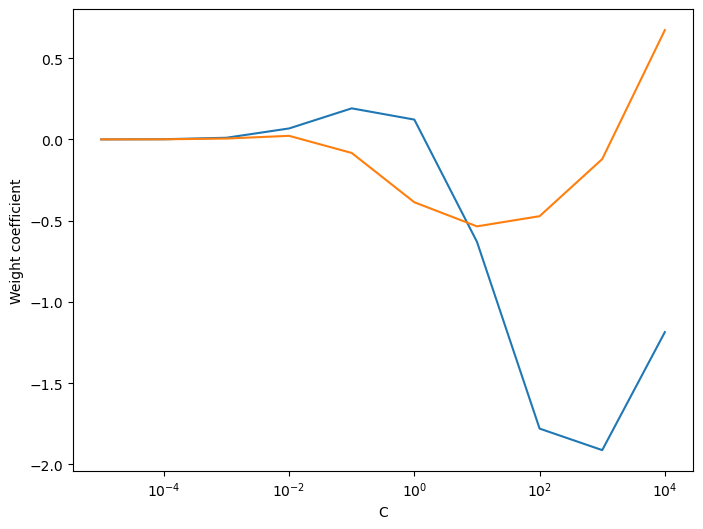

In [98]:
c_vals = np.arange(-5, 5)
n = len(c_vals)
p = 2
weights = np.zeros((n, p))
params = np.zeros(n)
for i, c in enumerate(c_vals):
    model = LogisticRegression(C=10.**c, fit_intercept=True).fit(X_train_scaled, y_train)
    weights[i, :] = model.coef_[1]  # For illustration purposes, only collect coefs from class 1
    params[i] = 10.**c

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(params, weights[:, 0], label='Petal length')
ax.plot(params, weights[:, 1], label='Petal width')
ax.set_ylabel('Weight coefficient')
ax.set_xlabel('C')
plt.xscale('log')

- As can be seen, the smaller C is, the smaller the weight coefficients are.
- When C is increasedc, we decrease the regularization strength and allow for larger coefficients.